In [1]:
import pandas as pd
medals=pd.read_csv('K:\TensorflowPY36CPU\TensorflowPY36CPU\_1_PythonBasic\Data\Data\Summer Olympic medallists 1896 to 2008 - ALL MEDALISTS .csv',skiprows=4 )



In [2]:
medals.shape


(29216, 10)

In [3]:
medals.head()


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [4]:
medals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


Using .value_counts() for ranking
pandas Series method .value_counts()
determine the top 15 countries ranked by total number of medals.
.value_counts() sorts by values by default.
The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order.

In [5]:
#Select the 'NOC' column of medals: country_name
country_names= medals['NOC']
print(type(country_names))
country_names.head()

<class 'pandas.core.series.Series'>


In [6]:
country_names2= medals[['NOC']] #[[]] Double Return DataFrame
print(type(country_names2))
country_names2.head()


<class 'pandas.core.frame.DataFrame'>


,NOC
0,HUN
1,AUT
2,GRE
3,GRE
4,GRE


In [7]:
## Count the number of medals won by each country: medal_counts

In [8]:
medal_counts = country_names.value_counts() 

In [9]:
medal_counts.head()

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
Name: NOC, dtype: int64

Using .pivot_table() to count medals by type¶
Rather than ranking countries by total medals won and showing that list, you may want to see a bit more detail.
You can use a pivot table to compute how many separate bronze, silver and gold medals each country won.
That pivot table can then be used to repeat the previous computation to rank by total medals won.

In [10]:
#construct the pivot table:counted by which medal
counted = medals.pivot_table(index='NOC',columns='Medal',values='Athlete',aggfunc='count')

In [11]:
counted.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [12]:
## construct a new columns to see how many medals in total

In [13]:
counted['totals'] = counted.sum(axis='columns')

In [14]:
counted.head(7)


Medal,Bronze,Gold,Silver,totals
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0
ARM,7.0,1.0,1.0,9.0
AUS,413.0,293.0,369.0,1075.0


In [15]:
## Sort the total 

In [16]:
counted =counted.sort_values('totals',ascending=False)

In [17]:
counted.head(10
            )

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


### Applying .drop_duplicates()
 - What could be the difference between the 'Event_gender' and 'Gender' columns?
 - you should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender)
 - The duplicates can be dropped using the .drop_duplicates() method, leaving behind the unique observations.

In [18]:
ev_gen = medals[['Event_gender','Gender']]

In [19]:
ev_gen.shape

(29216, 2)

In [20]:
ev_gen.head()


,Event_gender,Gender
0,M,Men
1,M,Men
2,M,Men
3,M,Men
4,M,Men


In [21]:
#drop duplicate pairs: 

In [22]:
ev_gen_uniques= ev_gen.drop_duplicates()

In [23]:
ev_gen_uniques


,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


### Finding possible errors with .groupby()

 - You can use groupby to see to count the rows
 - You will see that there is only one suspicious row, this is likely a data error

In [24]:
medals_by_gender = medals.groupby(['Event_gender','Gender'])

In [25]:
medals_count_by_gender = medals_by_gender.count()

In [26]:
medals_count_by_gender

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>City</th>
      <th>Edition</th>
      <th>Sport</th>
      <th>Discipline</th>
      <th>Athlete</th>
      <th>NOC</th>
      <th>Event</th>
      <th>Medal</th>
    </tr>
    <tr>
      <th>Event_gender</th>
      <th>Gender</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>M</th>
      <th>Men</th>
      <td>20067</td>
      <td>20067</td>
      <td>20067</td>
      <td>20067</td>
      <td>20067</td>
      <td>20067</td>
      <td>20067</td>
      <td>20067</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">W</th>
      <th>Men</th>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>Women</th>
      <td>7277</td>
      <td>7277</td>
      <td>7277</td>
      <td>7277</td>
      <td>7277</td>
      <td>7277</td>
      <td>7277</td>
      <td>7277</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">X</th>
      <th>Men</th>
      <td>1653</td>
      <td>1653</td>
      <td>1653</td>
      <td>1653</td>
      <td>1653</td>
      <td>1653</td>
      <td>1653</td>
      <td>1653</td>
    </tr>
    <tr>
      <th>Women</th>
      <td>218</td>
      <td>218</td>
      <td>218</td>
      <td>218</td>
      <td>218</td>
      <td>218</td>
      <td>218</td>
      <td>218</td>
    </tr>
  </tbody>
</table>
</div>

In [27]:
# Find which row is the error

In [28]:
#Create the boolean Series
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')
sus.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [29]:
suspect = medals[sus]
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


In [30]:
## Constructing alternative country Ranking

In [31]:
### Counting distinct events

In [32]:
print(len(medals['Sport'].unique()))

42


In [33]:
medals['Sport'].unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon'], dtype=object)

In [34]:
#Group medas by 'NOC'

In [35]:
country_grouped= medals.groupby('NOC')

In [36]:
# Count the number of distinct sprots in which each country won

In [37]:
Nsports = country_grouped['Sport'].nunique()

In [38]:
Nsports.sort_values(ascending=False).head()


NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
Name: Sport, dtype: int64

In [39]:
country_grouped['Sport'].count().head()

NOC
AFG      1
AHO      1
ALG     14
ANZ     29
ARG    239
Name: Sport, dtype: int64

## Counting USA vs. USSR Cold War Olympic Sports
 - The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR).
 - Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years. 

In [40]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war

In [41]:
during_cold_war = (medals.Edition>= 1952) & (medals.Edition<=1988)

In [42]:
print(during_cold_war.value_counts())


False    17637
True     11579
Name: Edition, dtype: int64


In [43]:
during_cold_war.head()

0    False
1    False
2    False
3    False
4    False
Name: Edition, dtype: bool

In [44]:
#Extract rows for 'NOC' is in 'USA' and 'USR
is_usa_usr = medals.NOC.isin(['USA','URS'])
print(is_usa_usr.value_counts())



False    22832
True      6384
Name: NOC, dtype: int64


In [45]:
is_usa_usr.head()

0    False
1    False
2    False
3    False
4    False
Name: NOC, dtype: bool

Counting USA vs. USSR Cold War Olympic Medals¶
see which country, the USA or the USSR, won the most medals consistently over the Cold War period.
ou'll need a pivot table with years ('Edition') on the index and countries ('NOC') on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a NaN in that entry of the pivot table.

In [46]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')
medals_won_by_country.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]
cold_war_usa_usr_medals

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [48]:
# Create most_medals
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')
most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year.head(10)

Edition  Medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
         Silver     14
1904     Bronze    111
         Gold      146
         Silver    137
1908     Bronze     15
Name: Athlete, dtype: int64

## Plot it

In [51]:
usa = medals[medals.NOC== 'USA']

In [52]:
usa_medals_by_year = usa.groupby(['Edition','Medal'])['Athlete'].count()


In [53]:
#Unstacking 
usa_medals_by_year= usa_medals_by_year.unstack(level='Medal')

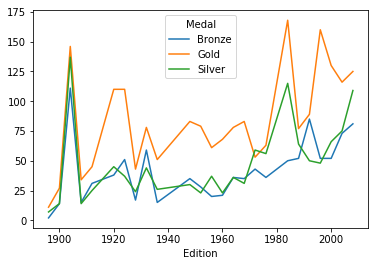

In [55]:
usa_medals_by_year.plot()
plt.show()

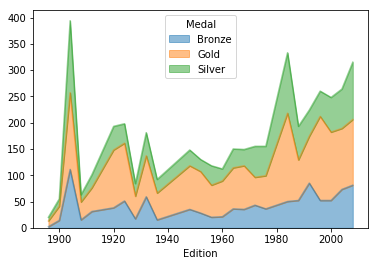

In [56]:
usa_medals_by_year.plot.area(alpha=.5)
plt.show()

## The order mess up in here Bronze < Gold < Silver
 - Visualizing
## USA Medal Counts by Edition: Area Plot with Ordered Medals
 - You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver.
 - However, you would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.
 - You can achieve this using Categorical types.

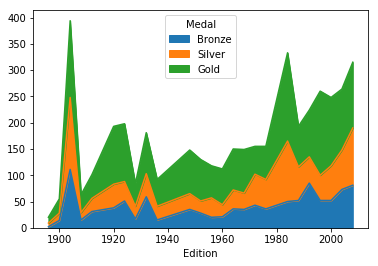

In [58]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal,categories=['Bronze','Silver','Gold'],ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()
